In [16]:
import pymc3 as pm
import math
import numpy as np
from scipy.stats import beta, binom
import pandas as pd

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:697: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 预测LTV

In [17]:
data_raw = np.array([1895, 204, 108, 86, 68, 53, 45, 32, 18, 24, 25, 12, 14, 16, 8, 14, 25, 21, 8, 10, 12, 9, 10, 17, 16, 6, 7, 3, 2, 12])
N = data_raw[0]
sum_30 = (data_raw / N).sum()
sum_30

1.467018469656992

In [87]:
math.p

In [124]:
data_raw = np.array([1895, 204, 108, 86, 68, 53, 45, 32, 18, 24, 25, 12, 14, 16, 8, 14, 25, 21, 8, 10, 12, 9, 10, 17, 16, 6, 7, 3, 2, 12])
N = data_raw[0]
sum_30 = (data_raw / N).sum()
retain_rate_pre = data_raw[1] / N


def sample_N(rt):
    def helper(N):
        def helper2(x):
            yield x
            rtt = int(binom.rvs(x, rt))
            yield from helper2(rtt)
        return helper2(N)
    return helper


ress = []
for fit_size in range(2, 9):
    with pm.Model() as m:
        retain_rate = pm.Beta("retain", 1, 1)
        retain_user = pm.Binomial("retain_user", data_raw[0:fit_size], retain_rate , shape=fit_size)
        retain_all = pm.Normal("retain_all", (retain_user), 0.001, observed=data_raw[1:fit_size+1])

        start = pm.find_MAP()
        print(start)
        step = pm.NUTS(scaling=start)
        trace = pm.sample(
            1000,
            step=step,
            start=start,
            tune=2000, cores=1, chains=2)
    

#     pm.traceplot(trace[:500])
    
    retain_rate_fit = trace[:100]['retain'].mean()


    TOTAL = int(10e7)

    res = []
    for i in range(0, 1000):
        g = sample_N(retain_rate_fit)(TOTAL)
        retain_rate_list = np.array([i[1] / TOTAL for i in takewhile(lambda x: x[0] < 30, enumerate(g))])
        res.append(retain_rate_list.sum())

    ress.append(pd.DataFrame({"idx": range(0, 1000), "prefit": res, "fit_size": [fit_size] * 1000}))


{'retain_logodds__': array(0.00092134), 'retain_user': array([948, 102], dtype=int64), 'retain': array(0.50023034)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 23 seconds.



{'retain_logodds__': array(0.00087625), 'retain_user': array([948, 102,  54], dtype=int64), 'retain': array(0.50021906)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 25 seconds.



{'retain_logodds__': array(0.00084339), 'retain_user': array([948, 102,  54,  43], dtype=int64), 'retain': array(0.50021085)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 27 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.



{'retain_logodds__': array(0.00081909), 'retain_user': array([948, 102,  54,  43,  34], dtype=int64), 'retain': array(0.50020477)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 29 seconds.



{'retain_logodds__': array(0.), 'retain_user': array([948, 102,  54,  43,  34,  26], dtype=int64), 'retain': array(0.5)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 31 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.



{'retain_logodds__': array(-0.00078645), 'retain_user': array([948, 102,  54,  43,  34,  26,  22], dtype=int64), 'retain': array(0.49980339)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 33 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.



{'retain_logodds__': array(-0.00077634), 'retain_user': array([948, 102,  54,  43,  34,  26,  22,  16], dtype=int64), 'retain': array(0.49980591)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [retain]
>Metropolis: [retain_user]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 35 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [128]:

# from plotnine import *

df = pd.concat(ress)
df.to_pickle('./df.pic')

In [6]:
from plotnine import *
import pandas as pd

df = pd.read_pickle('./df.pic')

In [9]:
df

,idx,prefit,fit_size
0,0,1.176016,2
1,1,1.176106,2
2,2,1.176018,2
3,3,1.176017,2
4,4,1.176034,2
...,...,...,...
995,995,1.327688,8
996,996,1.327756,8
997,997,1.327690,8
998,998,1.327740,8


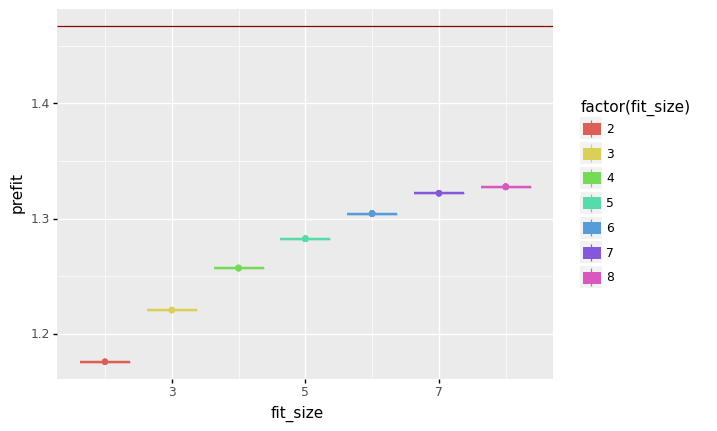

<ggplot: (-9223371911282272603)>

  ERROR: Can't roll back statsmodels; was not uninstalled
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'D:\\ProgramData\\Anaconda3\\Lib\\site-packages\\statsmodels\\nonparametric\\linbin.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, http://172.10.1.9:6869/simple/
  Using cached plotnine-0.7.1-py3-none-any.whl (4.4 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mizani-0.7.2-py3-none-any.whl (62 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.1
    Can't uninstall 'statsmodels'. No files were found to uninstall.


In [20]:
ggplot(df, aes(x='fit_size', y='prefit')) + geom_boxplot(aes(fill='factor(fit_size)', color="factor(fit_size)", group="fit_size")) + geom_hline(aes(yintercept=sum_30), color='darkred')


{'retain_logodds__': array(-2.11137539), 'recall_logodds__': array(0.00115009), 'retain_user': array([205,  22,  12], dtype=int64), 'recall_user': array([  0, 846, 894], dtype=int64), 'retain': array(0.1079961), 'recall': array(0.50028752)}


D:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Sequential sampling (3 chains in 1 job)
CompoundStep
>NUTS: [recall, retain]
>CompoundStep
>>Metropolis: [recall_user]
>>Metropolis: [retain_user]


Sampling 3 chains for 2_000 tune and 1_000 draw iterations (6_000 + 3_000 draws total) took 88 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
D:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'retain_user'}>,
        <AxesSubplot:title={'center':'retain_user'}>],
       [<AxesSubplot:title={'center':'recall_user'}>,
        <AxesSubplot:title={'center':'recall_user'}>],
       [<AxesSubplot:title={'center':'retain'}>,
        <AxesSubplot:title={'center':'retain'}>],
       [<AxesSubplot:title={'center':'recall'}>,
        <AxesSubplot:title={'center':'recall'}>]], dtype=object)

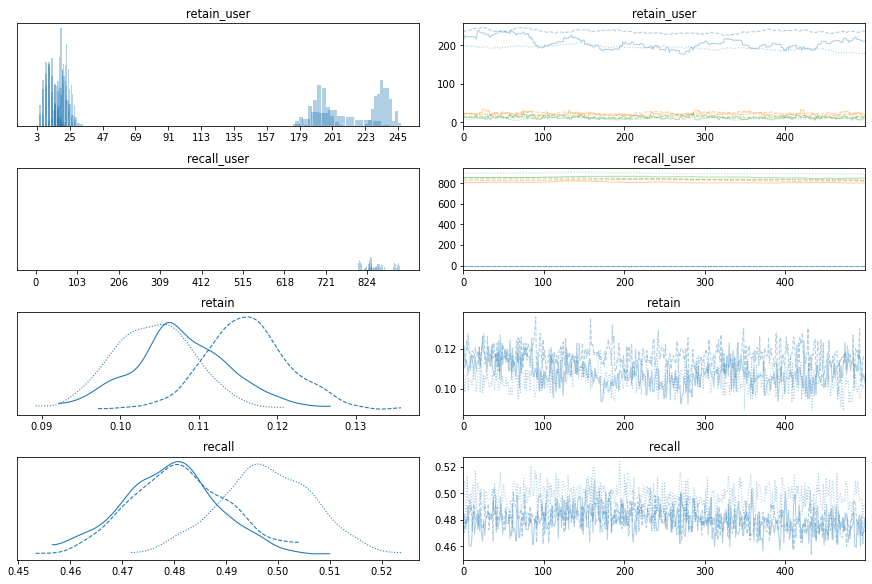

In [104]:
data_raw = np.array([1895, 204, 108, 86, 68, 53, 45, 32, 18, 24, 25, 12, 14, 16, 8, 14, 25, 21, 8, 10, 12, 9, 10, 17, 16, 6, 7, 3, 2, 12])
N = data_raw[0]
sum_30 = (data_raw / N).sum()
retain_rate_pre = data_raw[1] / N

with pm.Model() as m:
    retain_rate = pm.Beta("retain", int(1 + retain_rate_pre * N), int(1 + (1 - retain_rate_pre) * N ))
    recall_rate = pm.Beta("recall", 1, 1)
    retain_user = pm.Binomial("retain_user", data_raw[0:3], retain_rate , shape=3)
    recall_user = pm.Binomial("recall_user", (N - data_raw[0:3]),  recall_rate , shape=3)
    retain_all = pm.Normal("retain_all", (retain_user + recall_user), N / 10, observed=data_raw[1:4])

    start = pm.find_MAP()
    print(start)
    step = pm.NUTS(scaling=start)
    trace = pm.sample(
        1000,
        step=step,
        start=start,
        tune=2000, cores=1, chains=3)

pm.traceplot(trace[:500])

In [105]:
recall_rate_fit, retain_rate_fit = trace[:100]['recall'].mean(), trace[:100]['retain'].mean()

In [106]:
from scipy.stats import binom
from itertools import takewhile


def sample_N(rt, rc):
    def helper(N):
        def helper2(x):
            yield x
            rtt = int(binom.rvs(x, rt) )
            rct = int(binom.rvs(N - x, rc))
            yield from helper2(rtt + rct)
        return helper2(N)
    return helper

In [113]:
TOTAL = int(10e7)

res = []
for i in range(0, 1000):
    g = sample_N(retain_rate_fit, recall_rate_fit)(TOTAL)
    retain_rate_list = np.array([i[1] / TOTAL for i in takewhile(lambda x: x[0] < 30, enumerate(g))])
    res.append(retain_rate_list.sum())

In [109]:
retain_rate_list

array([1.        , 0.11174133, 0.44453895, 0.31978701, 0.36649768,
       0.34907771, 0.35557274, 0.35312191, 0.35405957, 0.35370656,
       0.35383227, 0.35375167, 0.35375176, 0.35378043, 0.35390312,
       0.35376517, 0.35376029, 0.35377594, 0.35382997, 0.35381887,
       0.353747  , 0.35383019, 0.35377612, 0.35386979, 0.35381812,
       0.35371127, 0.35373687, 0.35383805, 0.35370431, 0.35384207])

In [112]:
pd.Series(res).describe()

count    1000.000000
mean       11.083911
std         0.000176
min        11.083429
25%        11.083784
50%        11.083910
75%        11.084030
max        11.084424
dtype: float64

1.10203199